In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Read csv file into pandas
qual_stats = pd.read_csv('Data Frames/Statcasts Pitchers/Qualified_New_Pitch_stats.csv')
qual_stats.head()

,last_name,first_name,year,player_age,IP,Strikeout,Strikeout Percentage,Earned Runs,Win,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,z_swing_miss_percent,in_zone_percent,edge_percent,Slider_Rate,slider_avg_speed,Changeup_rate,ch_avg_speed,Curveball_rate,cu_avg_speed,fastball_rate,fastball_avg_speed
0,Ryu,Hyun Jin,2020,33,67.0,72,26.2,20,5,87.0,9.6,32.4,3.2,29.2,19.2,45.4,45.5,NaN,NaN,27.8,79.6,13.2,72.4,58.9,87.9
1,Maeda,Kenta,2020,32,66.2,80,32.3,20,6,85.3,10.8,31.0,7.0,24.7,19.7,43.7,41.4,38.6,82.9,29.4,84.5,3.4,78.5,28.4,91.0
2,Heaney,Andrew,2020,29,66.2,70,25.1,33,4,88.6,16.3,36.2,7.4,39.4,22.0,52.2,43.4,NaN,NaN,17.4,83.0,24.7,79.2,57.7,91.5
3,Bundy,Dylan,2020,28,65.2,72,27.0,24,6,87.0,14.5,30.6,4.6,32.9,18.4,49.4,45.6,25.0,79.9,21.3,82.2,11.6,73.5,41.9,90.1
4,Perez,Martin,2020,29,62.0,46,17.6,31,3,86.3,14.3,34.6,7.6,29.2,20.7,46.3,46.4,NaN,NaN,25.7,83.7,9.3,77.7,64.8,90.4


In [3]:
#Drop null values
del qual_stats['Slider_Rate']
del qual_stats['slider_avg_speed']
qual_stats_df = qual_stats.dropna()

#add categorical column based on players over 30
qual_stats_df['Over 30'] = np.where(qual_stats_df['player_age'] > 30, 1, 0)
qual_stats_df.head()

#add column to calculate ERA since it was not provided 
qual_stats_df['ERA'] = (qual_stats_df['Earned Runs']/qual_stats_df['IP']) * 9

qual_stats_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,last_name,first_name,year,player_age,IP,Strikeout,Strikeout Percentage,Earned Runs,Win,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,z_swing_miss_percent,in_zone_percent,edge_percent,Changeup_rate,ch_avg_speed,Curveball_rate,cu_avg_speed,fastball_rate,fastball_avg_speed,Over 30,ERA
0,Ryu,Hyun Jin,2020,33,67.0,72,26.2,20,5,87.0,9.6,32.4,3.2,29.2,19.2,45.4,45.5,27.8,79.6,13.2,72.4,58.9,87.9,1,2.686567
1,Maeda,Kenta,2020,32,66.2,80,32.3,20,6,85.3,10.8,31.0,7.0,24.7,19.7,43.7,41.4,29.4,84.5,3.4,78.5,28.4,91.0,1,2.719033
2,Heaney,Andrew,2020,29,66.2,70,25.1,33,4,88.6,16.3,36.2,7.4,39.4,22.0,52.2,43.4,17.4,83.0,24.7,79.2,57.7,91.5,0,4.486405
3,Bundy,Dylan,2020,28,65.2,72,27.0,24,6,87.0,14.5,30.6,4.6,32.9,18.4,49.4,45.6,21.3,82.2,11.6,73.5,41.9,90.1,0,3.312883
4,Perez,Martin,2020,29,62.0,46,17.6,31,3,86.3,14.3,34.6,7.6,29.2,20.7,46.3,46.4,25.7,83.7,9.3,77.7,64.8,90.4,0,4.500000


# Data Relationship Exploration with qualified pitcher leaders stats

Create a table of correlation coefficients to determine what additional variables might be good indicators for a Win

In [ ]:
#Explore relationship between Wins and possible inputs
win_qual_stats = qual_stats_df[['Win', 'Strikeout Percentage', 'Earned Runs', 'ERA', 'Strikeout', 'hard_hit_percent', 'edge_percent' ]]
win_qual_stats.corr(method='pearson')

,Win,Strikeout Percentage,Earned Runs,ERA,Strikeout,hard_hit_percent,edge_percent
Win,1.000000,0.159286,0.263677,-0.363656,0.648593,-0.261471,-0.101639
Strikeout Percentage,0.159286,1.000000,-0.437769,-0.564358,0.589794,-0.081076,-0.099037
Earned Runs,0.263677,-0.437769,1.000000,0.627320,0.280287,0.054975,-0.125786
ERA,-0.363656,-0.564358,0.627320,1.000000,-0.376494,0.322084,-0.055414
Strikeout,0.648593,0.589794,0.280287,-0.376494,1.000000,-0.247755,-0.174934
hard_hit_percent,-0.261471,-0.081076,0.054975,0.322084,-0.247755,1.000000,-0.166511
edge_percent,-0.101639,-0.099037,-0.125786,-0.055414,-0.174934,-0.166511,1.000000


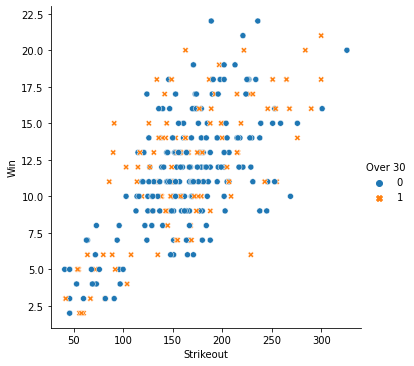

In [ ]:
#Explore strikeouts and wins 

sns.relplot(
    data=qual_stats_df,
    x="Strikeout", y="Win", 
    hue="Over 30", style="Over 30"
)

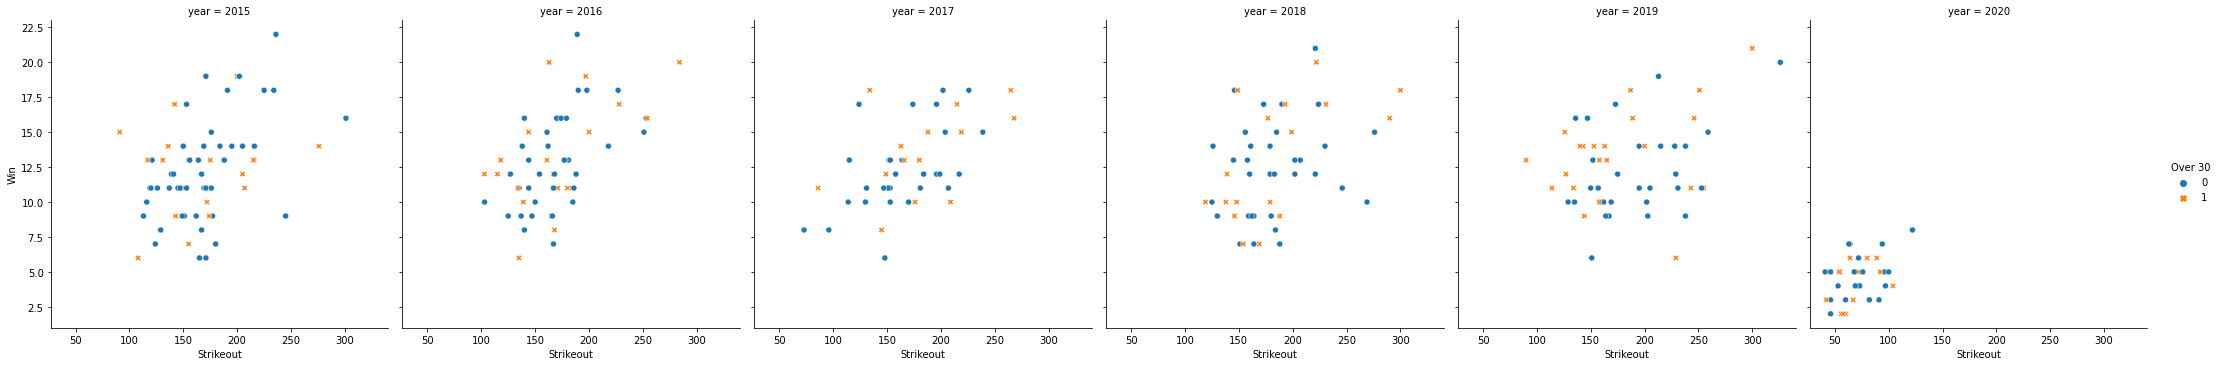

In [ ]:
#Explore strikeouts and wins per season

sns.relplot(
    data=qual_stats_df,
    x="Strikeout", y="Win", col='year',
    hue="Over 30", style="Over 30"
)

It appears that qualified pitcher leaders might not be the best to use for our model, similar to our results in the Basic Stats Notebook. Let's see what happens with all pitcher stats 2015-2020

In [4]:
#ALL STATS
#Read csv file into pandas
all_stats = pd.read_csv('Data Frames/Statcasts Pitchers/All_New_Pitch_stats.csv')
all_stats.head()

,last_name,first_name,year,player_age,IP,Strikeout,Strikeout_percentage,Earned Runs,Win,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,z_swing_miss_percent,in_zone_percent,edge_percent,Changeup_rate,ch_avg_speed,Curveball_rate,cu_avg_speed,Fastball_rate,fastball_avg_speed
0,Ryu,Hyun Jin,2020,33,67.0,72,26.2,20,5,87.0,9.6,32.4,3.2,29.2,19.2,45.4,45.5,27.8,79.6,13.2,72.4,58.9,87.9
1,Heaney,Andrew,2020,29,66.2,70,25.1,33,4,88.6,16.3,36.2,7.4,39.4,22.0,52.2,43.4,17.4,83.0,24.7,79.2,57.7,91.5
2,Bundy,Dylan,2020,28,65.2,72,27.0,24,6,87.0,14.5,30.6,4.6,32.9,18.4,49.4,45.6,21.3,82.2,11.6,73.5,41.9,90.1
3,Perez,Martin,2020,29,62.0,46,17.6,31,3,86.3,14.3,34.6,7.6,29.2,20.7,46.3,46.4,25.7,83.7,9.3,77.7,64.8,90.4
4,Nola,Aaron,2020,27,71.1,96,33.2,26,5,88.3,8.6,34.5,5.4,38.1,20.7,44.1,46.0,27.3,84.9,26.6,78.6,45.9,92.3


In [5]:
#drop null values
all_stats_df = all_stats.dropna()

#add categorical column based on players over 30
all_stats_df['Over 30'] = np.where(all_stats_df['player_age'] > 30, 1, 0)
all_stats_df.head()

#add column to calculate ERA since it was not provided 
all_stats_df['ERA'] = (all_stats_df['Earned Runs']/all_stats_df['IP']) * 9

all_stats_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,last_name,first_name,year,player_age,IP,Strikeout,Strikeout_percentage,Earned Runs,Win,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,z_swing_miss_percent,in_zone_percent,edge_percent,Changeup_rate,ch_avg_speed,Curveball_rate,cu_avg_speed,Fastball_rate,fastball_avg_speed,Over 30,ERA
0,Ryu,Hyun Jin,2020,33,67.0,72,26.2,20,5,87.0,9.6,32.4,3.2,29.2,19.2,45.4,45.5,27.8,79.6,13.2,72.4,58.9,87.9,1,2.686567
1,Heaney,Andrew,2020,29,66.2,70,25.1,33,4,88.6,16.3,36.2,7.4,39.4,22.0,52.2,43.4,17.4,83.0,24.7,79.2,57.7,91.5,0,4.486405
2,Bundy,Dylan,2020,28,65.2,72,27.0,24,6,87.0,14.5,30.6,4.6,32.9,18.4,49.4,45.6,21.3,82.2,11.6,73.5,41.9,90.1,0,3.312883
3,Perez,Martin,2020,29,62.0,46,17.6,31,3,86.3,14.3,34.6,7.6,29.2,20.7,46.3,46.4,25.7,83.7,9.3,77.7,64.8,90.4,0,4.500000
4,Nola,Aaron,2020,27,71.1,96,33.2,26,5,88.3,8.6,34.5,5.4,38.1,20.7,44.1,46.0,27.3,84.9,26.6,78.6,45.9,92.3,0,3.291139


In [6]:
#Explore relationship between Wins and possible inputs
win_all_stats = all_stats_df[['Win', 'Strikeout_percentage', 'Earned Runs', 'ERA', 'Strikeout', 'hard_hit_percent', 'edge_percent' ]]
win_all_stats.corr(method='pearson')

,Win,Strikeout_percentage,Earned Runs,ERA,Strikeout,hard_hit_percent,edge_percent
Win,1.000000,0.253435,0.540855,-0.378505,0.814596,-0.134194,0.124821
Strikeout_percentage,0.253435,1.000000,-0.217544,-0.523879,0.510139,-0.142782,-0.084108
Earned Runs,0.540855,-0.217544,1.000000,0.346306,0.589692,0.182454,0.092064
ERA,-0.378505,-0.523879,0.346306,1.000000,-0.361210,0.412973,-0.064386
Strikeout,0.814596,0.510139,0.589692,-0.361210,1.000000,-0.103727,0.062349
hard_hit_percent,-0.134194,-0.142782,0.182454,0.412973,-0.103727,1.000000,-0.079751
edge_percent,0.124821,-0.084108,0.092064,-0.064386,0.062349,-0.079751,1.000000


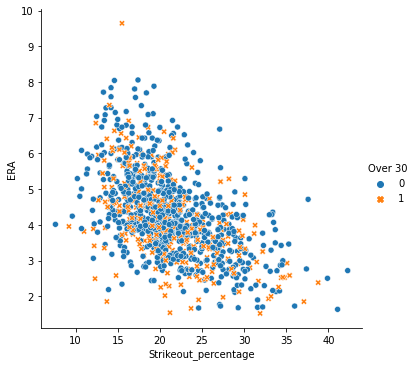

In [7]:
#Explore strikeout% and ERA

sns.relplot(
    data=all_stats_df,
    x="Strikeout_percentage", y="ERA",
    hue="Over 30", style="Over 30"
)

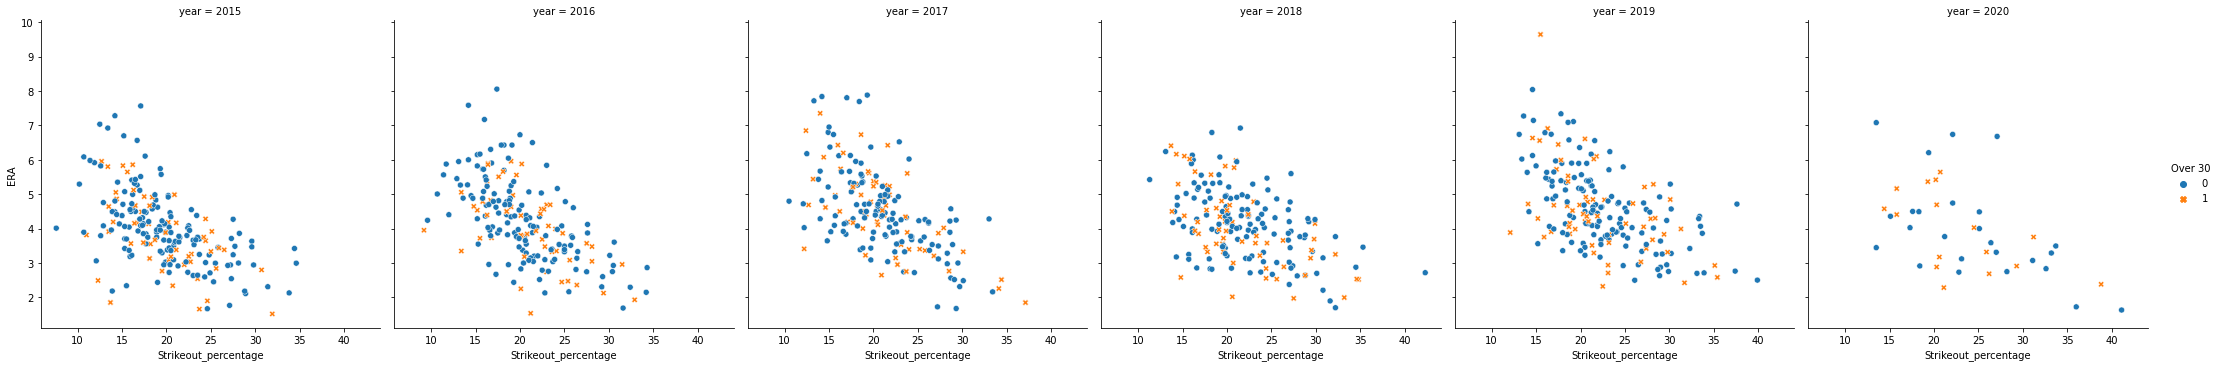

In [8]:
#Explore strikeout% and ERA per season

sns.relplot(
    data=all_stats_df,
    x="Strikeout_percentage", y="ERA", col='year',
    hue="Over 30", style="Over 30"
)

**OBSERVATIONS:** 

For Wins, strikeouts has the highest correlation. A lower ERA for pitchers is loosely correlated with more wins (expected). 

For ERA, strikeout percentage and hard hit percentage have the highest correlation. 

*Next Steps:* Create and quantify linear regression model for strikeouts as the primary indicator for wins. Then perform more tests to explore indicators for higher strikes

# Model Prediction for W based on Strikeouts using Pitcher Data from Statcasts 2015-2020

In [ ]:
#Assign data and reshape 
X = all_stats_df["Strikeout"].values.reshape(-1, 1)
Y = all_stats_df["Win"].values.reshape(-1, 1)

#Create Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#fit the model
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Test first prediction, calculate mean_squared error and r-squared value
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X)

mse = mean_squared_error(Y, predictions)
r2 = r2_score(Y, predictions)
print(f"True output: {Y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-Y[0]}")

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


True output: [5]
Predicted output: [4.76031445]
Prediction Error: [-0.23968555]
Mean Squared Error (MSE): 6.739090077160357
R-squared (R2): 0.663567453321898


In [ ]:
#Overall score for the model 
model.score(X,Y)

0.663567453321898

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6183279528963026

So far, the model score is moderate (and lower than our basic stats notebook model) - it takes more than just the number of strikes to predict number of wins. 

Next, let's explore other variables that might impact strikeouts and enhance our win prediction model

# Data Relationship Exploration with Statcast pitcher data from 2015-2020 to determine what might impact strikeouts and or strikeout percentage

In [ ]:
#Test Input Values for Strikeouts to explore possible correlations
sk_qual_stats = qual_stats_df[['Strikeout Percentage', 'Earned Runs', 'ERA', 'Strikeout', 'exit_velocity_avg', 'launch_angle_avg',	'sweet_spot_percent',	'hard_hit_percent',	'z_swing_miss_percent',	'in_zone_percent',	'edge_percent',	'Changeup_rate',	'ch_avg_speed',	'Curveball_rate',	'cu_avg_speed',	'fastball_rate',	'fastball_avg_speed'  ]]
sk_qual_stats.corr(method='pearson')

,Strikeout Percentage,Earned Runs,ERA,Strikeout,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,hard_hit_percent,z_swing_miss_percent,in_zone_percent,edge_percent,Changeup_rate,ch_avg_speed,Curveball_rate,cu_avg_speed,fastball_rate,fastball_avg_speed
Strikeout Percentage,1.000000,-0.437769,-0.564358,0.589794,-0.149719,0.180085,-0.021772,-0.081076,0.799029,0.043840,-0.099037,-0.120324,0.332839,0.115529,0.264707,-0.239514,0.426612
Earned Runs,-0.437769,1.000000,0.627320,0.280287,0.258435,0.048074,0.123417,0.054975,-0.373399,0.092657,-0.125786,-0.105934,-0.100947,-0.030540,-0.042372,0.167919,-0.116054
ERA,-0.564358,0.627320,1.000000,-0.376494,0.328525,0.054625,0.318504,0.322084,-0.445991,-0.048403,-0.055414,0.081949,-0.300782,-0.012493,-0.174456,0.047578,-0.252402
Strikeout,0.589794,0.280287,-0.376494,1.000000,-0.101928,0.120226,-0.073292,-0.247755,0.442855,0.163191,-0.174934,-0.265245,0.320392,0.067458,0.222544,-0.033741,0.360907
exit_velocity_avg,-0.149719,0.258435,0.328525,-0.101928,1.000000,-0.002741,0.065130,0.814238,-0.283237,0.040829,-0.234739,-0.206467,0.049204,0.115084,0.095656,0.060757,0.019305
launch_angle_avg,0.180085,0.048074,0.054625,0.120226,-0.002741,1.000000,0.428780,-0.049433,0.404884,0.241819,0.027575,0.076081,-0.331159,-0.129518,-0.256455,0.005165,-0.190235
sweet_spot_percent,-0.021772,0.123417,0.318504,-0.073292,0.065130,0.428780,1.000000,0.146617,0.063310,0.047665,0.021981,0.091595,-0.279277,0.079623,-0.210334,-0.058226,-0.244162
hard_hit_percent,-0.081076,0.054975,0.322084,-0.247755,0.814238,-0.049433,0.146617,1.000000,-0.213046,0.027510,-0.166511,-0.152638,0.044504,0.169903,0.091951,-0.013803,0.016319
z_swing_miss_percent,0.799029,-0.373399,-0.445991,0.442855,-0.283237,0.404884,0.063310,-0.213046,1.000000,0.167644,0.041384,0.134213,0.142646,-0.079435,0.137757,-0.199222,0.355934
in_zone_percent,0.043840,0.092657,-0.048403,0.163191,0.040829,0.241819,0.047665,0.027510,0.167644,1.000000,0.076225,-0.196703,0.089021,0.016948,0.140050,0.146971,0.230206


**INITIAL OBSERVATIONS:** Nothing really obvious jumps out at first glance. Pitching speed is more important than the type of pitch thrown across the board.  

*Interesting:* strikeout percentage has a higher correlation coefficient with ERA than actual strikeouts. Hard hit % has a pretty high correlation coefficient with exit velocity average (expected based on how HH% is calculated). Swing miss percentage also has a high correlation with strikeout percentage and a moderate one with strikeouts and ERA. 

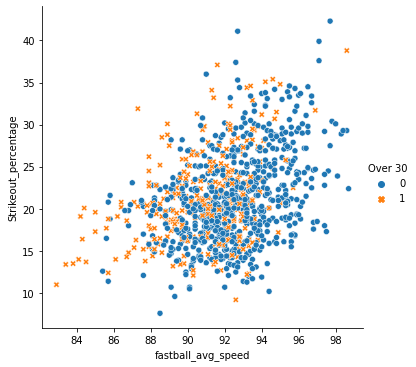

In [12]:
#Explore Average fastball speed and strikeout% 

sns.relplot(
    data=all_stats_df,
    x="fastball_avg_speed", y='Strikeout_percentage',
    hue="Over 30", style="Over 30"
)

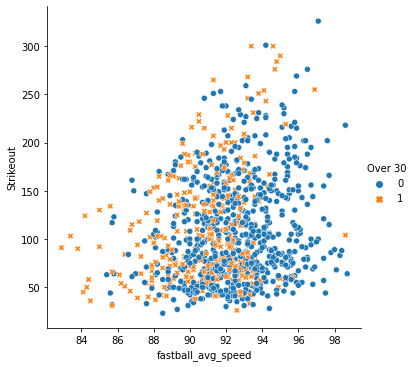

In [13]:
#Explore Average Fastball Speed and strikeout %

sns.relplot(
    data=all_stats_df,
    x="fastball_avg_speed", y='Strikeout',
    hue="Over 30", style="Over 30"
)

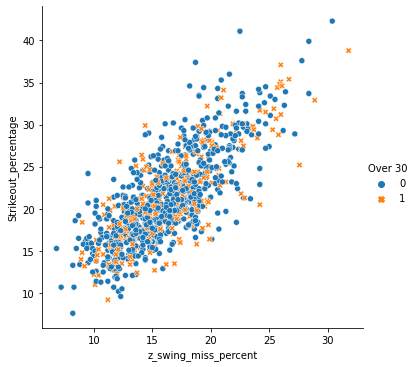

In [14]:
#Explore swing-miss% and strikeout%

sns.relplot(
    data=all_stats_df,
    x="z_swing_miss_percent", y='Strikeout_percentage',
    hue="Over 30", style="Over 30"
)

# Model Predictions for Strikeout % using Pitcher Data from Statcasts 2015-2020

In [22]:
#Multiple Linear Regression Model to predict strikeout percentage

X = all_stats_df[["z_swing_miss_percent", "fastball_avg_speed"]]
Y = all_stats_df["Strikeout_percentage"].values.reshape(-1, 1)

#Use test/train split to create model using linear regression

from sklearn.model_selection import train_test_split
X_train, X_test, Y_Train, Y_test = train_test_split(X, Y, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

#fit the model and calculate
model.fit(X_train, Y_Train)
training_score = model.score(X_train, Y_Train)
testing_score = model.score(X_test, Y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.615725227424754
Testing Score: 0.6243560816402245


NameError: ignored

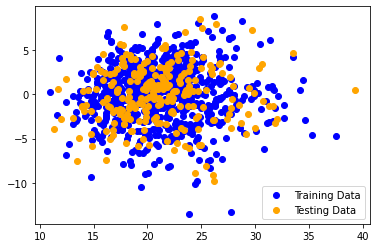

In [23]:
#Plot Residuals for test/train data
plt.scatter(model.predict(X_train), model.predict(X_train) - Y_Train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - Y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())

plt.title("Residual Plot")

In [24]:
#calculate MSE and R2

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Y_test, model.predict(X_test))
r2 = model.score(X_test, Y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 10.637402600811324, R2: 0.6243560816402245


Let's Experiment with other models to see if it improves our results

In [25]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train, Y_Train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(Y_test, model.predict(X_test))
r2 = lasso.score(X_test, Y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 10.637402600811324, R2: 0.624442676314577


In [26]:
#Ridge model 
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train, Y_Train)

predictions = ridge.predict(X_test)

MSE = mean_squared_error(Y_test, model.predict(X_test))
r2 = ridge.score(X_test, Y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 10.637402600811324, R2: 0.6243561362501555


In [27]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train, Y_Train)

predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(Y_test, model.predict(X_test))
r2 = elasticnet.score(X_test, Y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 10.637402600811324, R2: 0.6244197935479676


The Lasso Model proves slightly better but not enough to make a significant impact.

Let's see if we have better luck determining indicators for the ERA

# More data relationship exploration fun

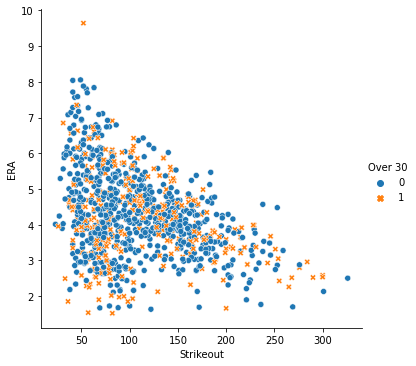

In [28]:
#Explore ERA and strikeouts
sns.relplot(
    data=all_stats_df,
    x="Strikeout", y='ERA',
    hue="Over 30", style="Over 30"
)

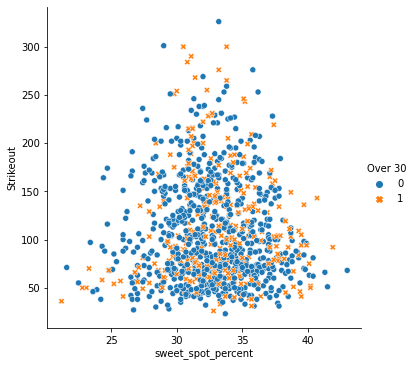

In [29]:
#Explore sweet spot % and Strikeouts

sns.relplot(
    data=all_stats_df,
    x="sweet_spot_percent", y='Strikeout',
    hue="Over 30", style="Over 30"
)

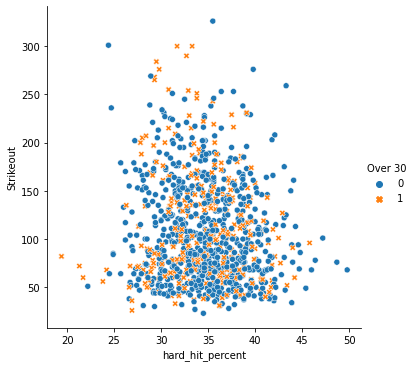

In [30]:
#Explore hard hit % and Strikeouts

sns.relplot(
    data=all_stats_df,
    x="hard_hit_percent", y='Strikeout',
    hue="Over 30", style="Over 30"
)

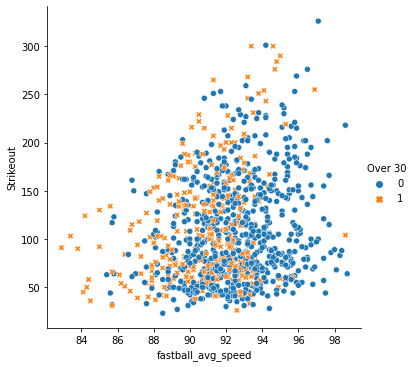

In [32]:
#Explore Average Fastball Speed and Strikeouts

sns.relplot(
    data=all_stats_df,
    x="fastball_avg_speed", y='Strikeout',
    hue="Over 30", style="Over 30"
)

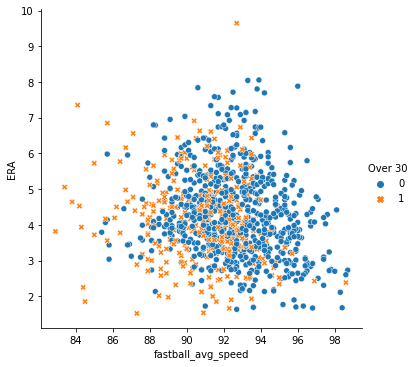

In [33]:
#Explore Average Fastball Speed and ERA

sns.relplot(
    data=all_stats_df,
    x="fastball_avg_speed", y='ERA',
    hue="Over 30", style="Over 30"
)

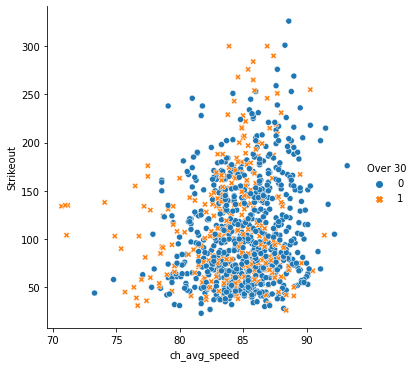

In [34]:
#Explore Average Changeball Speed and Strikeout

sns.relplot(
    data=all_stats_df,
    x="ch_avg_speed", y='Strikeout',
    hue="Over 30", style="Over 30"
)

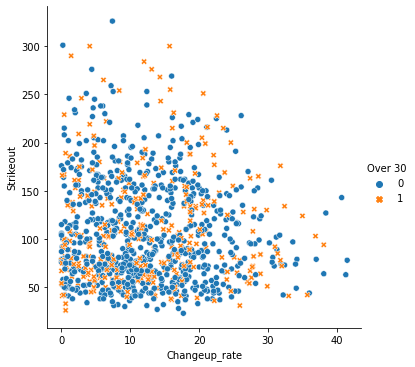

In [35]:
#Explore Changeup Rate and Strikeouts

sns.relplot(
    data=all_stats_df,
    x="Changeup_rate", y='Strikeout',
    hue="Over 30", style="Over 30"
)

# Enhanced data model for win prediction

In [41]:
#Multiple Linear Regression Model to predict Win

X = all_stats_df[["Strikeout_percentage", "fastball_avg_speed", "Strikeout", "ERA", "z_swing_miss_percent" ]]
Y = all_stats_df["Win"].values.reshape(-1, 1)

#Use test/train split to create model using linear regression

from sklearn.model_selection import train_test_split
X_train, X_test, Y_Train, Y_test = train_test_split(X, Y, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

#fit the model and calculate
model.fit(X_train, Y_Train)
training_score = model.score(X_train, Y_Train)
testing_score = model.score(X_test, Y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7432488796111006
Testing Score: 0.7062468097709352


In [42]:
#Calculate MSE and R2 Score

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Y_test, model.predict(X_test))
r2 = model.score(X_test, Y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 5.646182035676437, R2: 0.7062468097709352


In [44]:
#Multiple Linear Regression Model to predict strikeout percentage (just for fun)

X = all_stats_df[["fastball_avg_speed", "z_swing_miss_percent", "Strikeout" ]]
Y = all_stats_df["Strikeout_percentage"].values.reshape(-1, 1)

#Use test/train split to create model using linear regression

from sklearn.model_selection import train_test_split
X_train, X_test, Y_Train, Y_test = train_test_split(X, Y, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

#fit the model and calculate
model.fit(X_train, Y_Train)
training_score = model.score(X_train, Y_Train)
testing_score = model.score(X_test, Y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6809084819427345
Testing Score: 0.6791178314897744


**FINAL OBSERVATION:** This model performed worse for predicting wins based on our additional "indicators" and did not give us an advantage. One really has to understand the relationship between the data to finetune a model that works. If you're not an expert (like me), learn more and trust the actual experts!!! Stick with what they tell you, learn more, then explore! 